### Face Emotion Recognition

Mount the GDrive in this Google colab

In [1]:
# Code for mounting your Gdrive

from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


Import all the important libraries

In [2]:
import numpy as np
import tensorflow as tf
import os

In [11]:
train_dir = "/content/drive/MyDrive/images/train/"

In [12]:
 # This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [13]:
BATCH_SIZE = 100
IMG_SHAPE  = 50

In [14]:
#image agumentation 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen_train = ImageDataGenerator(
      rescale=1./255,#rescaling
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      featurewise_center =True,#standardization
      featurewise_std_normalization = True)

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     color_mode = 'rgb',# color 
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')


Found 23107 images belonging to 7 classes.


Load data using a Keras utility

In [15]:
batch_size = 32
img_height = 200
img_width = 200

Doing validation split on dataset to segregate as train data (80%) and test data (20%)

In [16]:
#spliting the train into train
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 23107 files belonging to 7 classes.
Using 20797 files for training.


In [17]:
#spliting the data to validate
validation_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.09,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 23107 files belonging to 7 classes.
Using 2079 files for validation.


In [18]:
#spliting the data to test
test_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.01,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 23107 files belonging to 7 classes.
Using 231 files for validation.


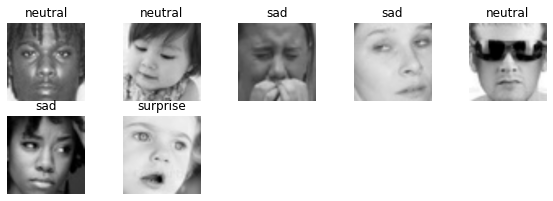

In [19]:
import matplotlib.pyplot as plt

class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(len(class_names)):
        ax = plt.subplot(6,5 , i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

Configure the dataset for performance

A basic Keras model

In [23]:
num_classes=7
from keras import Sequential
from keras import layers

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_names), activation='softmax'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [24]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# CNN Model 1: A Basic Keras Model

In [ ]:
epochs=1
history= model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

42/42 [==============================] - 35s 827ms/step - loss: 0.4396 - accuracy: 0.8427 - val_loss: 0.1092 - val_accuracy: 0.9669


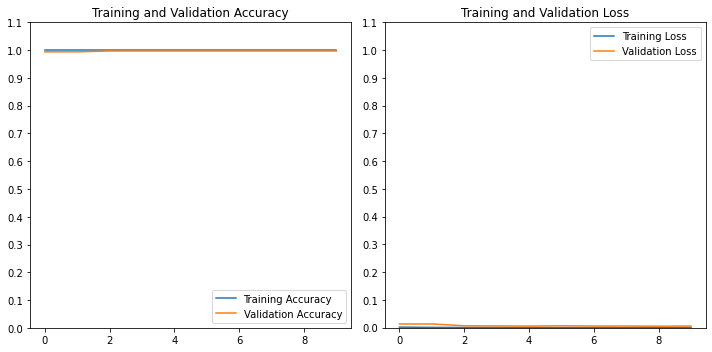

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



# CNN Model 2: Experimenting with Convolutional Pooling Pairs

In [ ]:
from keras import Sequential
from keras import layers

model2 = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
   
    
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
 

    
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

In [ ]:
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model2.fit(train_ds, batch_size=32,validation_batch_size=32, validation_data=validation_ds,epochs=10)

Epoch 1/10
42/42 [==============================] - 10s 217ms/step - loss: 8.3180e-05 - accuracy: 1.0000 - val_loss: 0.0373 - val_accuracy: 0.9940
Epoch 2/10
42/42 [==============================] - 7s 169ms/step - loss: 7.5934e-05 - accuracy: 1.0000 - val_loss: 0.0372 - val_accuracy: 0.9940
Epoch 3/10
42/42 [==============================] - 7s 166ms/step - loss: 6.7591e-05 - accuracy: 1.0000 - val_loss: 0.0376 - val_accuracy: 0.9940
Epoch 4/10
42/42 [==============================] - 8s 171ms/step - loss: 6.5873e-05 - accuracy: 1.0000 - val_loss: 0.0371 - val_accuracy: 0.9940
Epoch 5/10
42/42 [==============================] - 8s 170ms/step - loss: 5.6009e-05 - accuracy: 1.0000 - val_loss: 0.0369 - val_accuracy: 0.9940
Epoch 6/10
42/42 [==============================] - 8s 169ms/step - loss: 5.0408e-05 - accuracy: 1.0000 - val_loss: 0.0369 - val_accuracy: 0.9940
Epoch 7/10
42/42 [==============================] - 8s 175ms/step - loss: 4.7565e-05 - accuracy: 1.0000 - val_loss: 0.0366 

range(0, 10)


Text(0.5, 1.0, 'Training and Validation Loss')

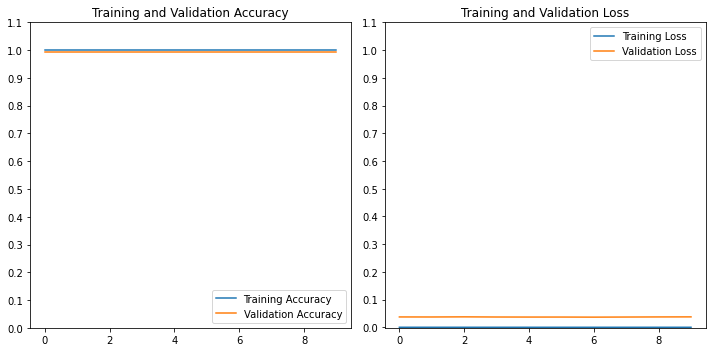

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



# CNN Model 3: Experimenting with percentage dropout

In [ ]:
from keras import Sequential
from keras import layers

model3 = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.05),
    
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.05),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

In [ ]:
model3.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model3.fit(train_ds, batch_size=32,validation_batch_size=32, validation_data=validation_ds,epochs=10)

Epoch 1/10
42/42 [==============================] - 94s 2s/step - loss: 46.1909 - accuracy: 0.5500 - val_loss: 0.6681 - val_accuracy: 0.7048
Epoch 2/10
42/42 [==============================] - 90s 2s/step - loss: 0.3965 - accuracy: 0.8638 - val_loss: 0.3528 - val_accuracy: 0.8584
Epoch 3/10
42/42 [==============================] - 86s 2s/step - loss: 0.2473 - accuracy: 0.9210 - val_loss: 0.2274 - val_accuracy: 0.9187
Epoch 4/10
42/42 [==============================] - 89s 2s/step - loss: 0.1984 - accuracy: 0.9398 - val_loss: 0.2069 - val_accuracy: 0.9337
Epoch 5/10
42/42 [==============================] - 89s 2s/step - loss: 0.1148 - accuracy: 0.9646 - val_loss: 0.2934 - val_accuracy: 0.8735
Epoch 6/10
42/42 [==============================] - 89s 2s/step - loss: 0.1209 - accuracy: 0.9601 - val_loss: 0.1288 - val_accuracy: 0.9699
Epoch 7/10
42/42 [==============================] - 91s 2s/step - loss: 0.0812 - accuracy: 0.9767 - val_loss: 0.2352 - val_accuracy: 0.9036
Epoch 8/10
42/42 [=

Text(0.5, 1.0, 'Training and Validation Loss')

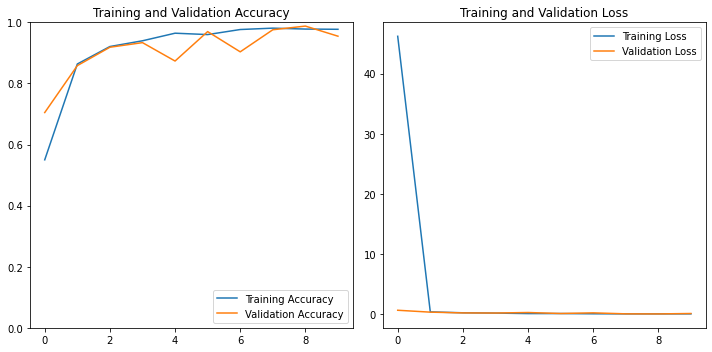

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



#Transfer Learning

In [ ]:
transfer_model = Sequential([
    tf.keras.applications.MobileNet(
        input_shape=(img_height, img_width, 3),
    alpha=1.0,
    dropout=0.001,
    include_top=False,
    weights="imagenet",
),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu',
                bias_regularizer='l2',
                activity_regularizer='l2'
                ),
    layers.Dense(len(class_names),activation='softmax',
                bias_regularizer='l2',
                activity_regularizer='l2'
                )
])

In [ ]:
transfer_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history1 = transfer_model.fit(train_ds, batch_size=32,validation_batch_size=32, validation_data=validation_ds,epochs=10)

Text(0.5, 1.0, 'Training and Validation Loss')

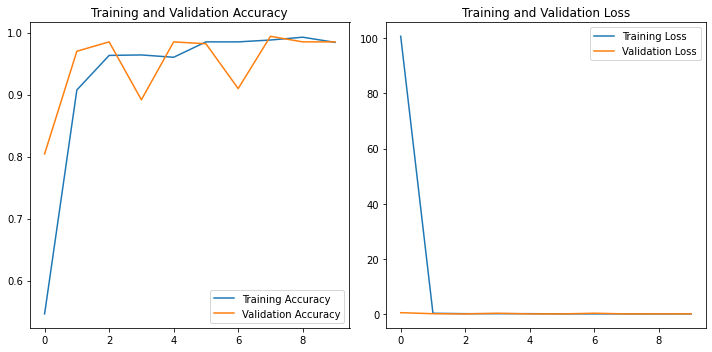

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



# Comapring all 4 models:

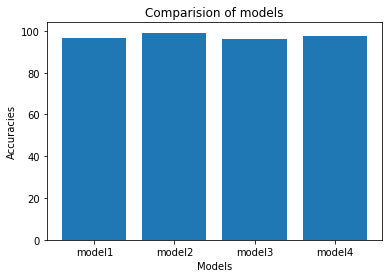

In [27]:
#graph for different parameters
import matplotlib.pyplot as plt

# Data for the graph
x_values = ['model1','model2','model3','model4']#accuracies
y_values = [96.5768, 99.1567,95.908,97.45778]

# Create a bar graph
plt.bar(x_values, y_values)

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Accuracies")
plt.title("Comparision of models")

# Show the graph
plt.show()


# Time taken for each CNN model:

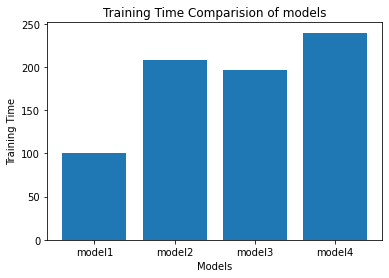

In [30]:
#graph for different parameters training time
import matplotlib.pyplot as plt

# Data for the graph
x_values = ['model1','model2','model3','model4']#accuracies
y_values = [100.1, 207.5678, 196.908, 239.56]

# Create a bar graph
plt.bar(x_values, y_values)

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Training Time")
plt.title("Training Time Comparision of models")

# Show the graph
plt.show()


REFERENCES

https://ai-journey.com/2018/08/build-cnn-for-facial-expression-recognition-with-tensorflow-eager-on-google-colab/


https://www.section.io/engineering-education/image-preprocessing-in-python/



https://towardsdatascience.com/the-ultimate-guide-to-emotion-recognition-from-facial-expressions-using-python-64e58d4324ff


https://www.analyticsvidhya.com/blog/2021/11/facial-emotion-detection-using-cnn/



https://www.kaggle.com/code/slavenjabuka/mobilenetv2


